# Namibian power network in pypsa-earth

This notebook produces network plot for Namibia

In [1]:
import pypsa
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
from shapely.validation import make_valid

Required files:
- Electricity network found in "networks" directory.
- Shape file for namibia, found in "resources/shape" directory

In [2]:
n_30 = pypsa.Network("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/networks/elec_s_30.nc")
n_elec = pypsa.Network("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/networks/elec_s_30_ec_lc1.0_Co2L.nc")

regions_onshore = gpd.read_file("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/shapes/gadm_shapes.geojson")
regions_offshore = gpd.read_file("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/shapes/offshore_shapes.geojson")
substations_OSMclean_path = "../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/osm/clean/all_clean_substations.geojson"

lines_OSMclean_path = "../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/osm/clean/all_clean_lines.geojson"


INFO:pypsa.io:Imported network elec_s_30.nc has buses, carriers, generators, lines, loads
INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L.nc has buses, carriers, generators, global_constraints, lines, loads


Define plot parameters:

In [7]:
#bus_scale = 5e3 
#line_scale = 3e3
bus_scale = 9e1 
line_scale = 1e3

In [12]:

def plot_elec_network(n, line=False, fn=None):
    bus_scale = 9e1 
    line_scale = 1e3
    fig, ax = plt.subplots(figsize=(20, 9), subplot_kw={"projection": ccrs.PlateCarree()})
    gen = n.generators.groupby(["bus", "carrier"]).p_nom.sum()
    sto = n.storage_units.groupby(["bus", "carrier"]).p_nom.sum()
    buses = pd.concat([gen, sto])
    lines=0; links=0;
    if line:
        lines = n.lines.s_nom / line_scale
        links=n.links.p_nom / line_scale,

    with plt.rc_context({"patch.linewidth": 0.}):
        n.plot(
            bus_sizes=buses / bus_scale,
            bus_alpha=0.9,
            line_widths=lines,#n.lines.s_nom / line_scale,
            link_widths=links,#n.links.p_nom / line_scale,
            line_colors="teal",
            bus_colors=n.carriers.color,
            ax=ax,
            margin=0.2,
            color_geomap=True,
        )
    regions_onshore.plot(
        ax=ax,
        facecolor="white",
        edgecolor="black",
        aspect="equal",
        transform=ccrs.PlateCarree(),
        linewidth=0,
    )
    # regions_offshore.plot(
    #     ax=ax,
    #     facecolor="blue",
    #     edgecolor="blue",
    #     aspect="equal",
    #     transform=ccrs.PlateCarree(),
    #     linewidth=1,
    # )
    #ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    ax.add_geometries(regions_onshore['geometry'], facecolor='white', edgecolor='gray', crs=ccrs.PlateCarree())
    ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    legend_kwargs = {"loc": "upper left", "frameon": False}
    # circles legend may requite some fine-tuning
    legend_circles_dict = {"bbox_to_anchor": (1, 1.1), "labelspacing":11, "handletextpad":7, "title":"Capacity", **legend_kwargs}
    #bus_sizes = [5000, 10e3]  # in MW
    bus_sizes = [10, 100, 500]  # in MW
    line_sizes = [1000, 3000]  # in MW
    add_legend_circles(
        ax,
        [s / bus_scale for s in bus_sizes],
        [f"{s} MW" for s in bus_sizes],
        legend_kw=legend_circles_dict,    
    )
    if line:
        add_legend_lines(
            ax,
            [s / line_scale for s in line_sizes],
            [f"{s / 1000} GW" for s in line_sizes],
            legend_kw={"bbox_to_anchor": (1, 1.0), "handletextpad":7, **legend_kwargs},
        )
    add_legend_patches(
        ax,
        n.carriers.color,
        n.carriers.nice_name,
        legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left", "handletextpad":1.5, "title":"Technology",},
    )
    fig.tight_layout()
#fig.savefig("brownfield_capacities_" + country_code + ".png", bbox_inches="tight", dpi=300)


/home/raj08555/.conda/envs/pypsa-earth-old/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


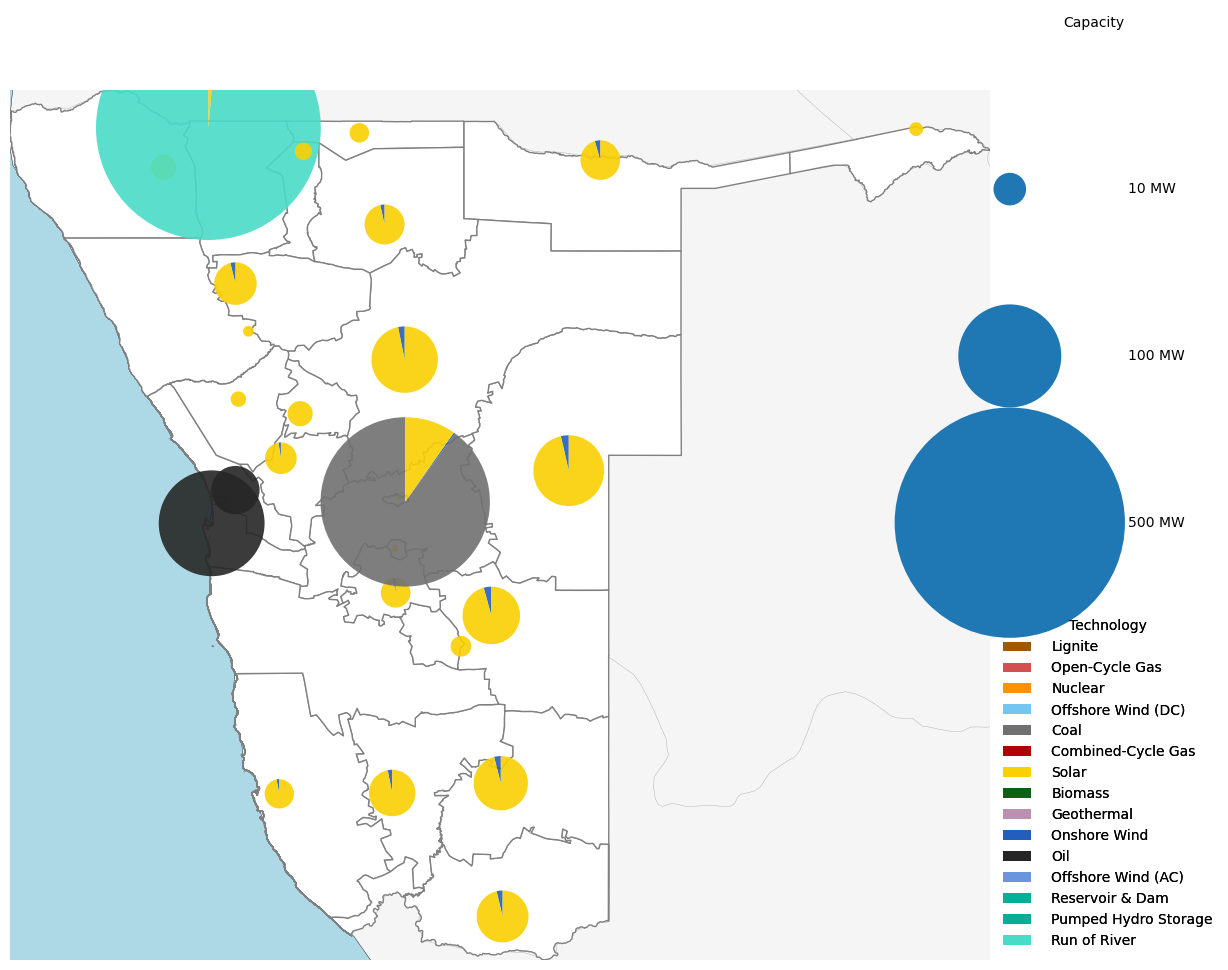

In [13]:
plot_elec_network(n_elec)

/home/raj08555/.conda/envs/pypsa-earth-old/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


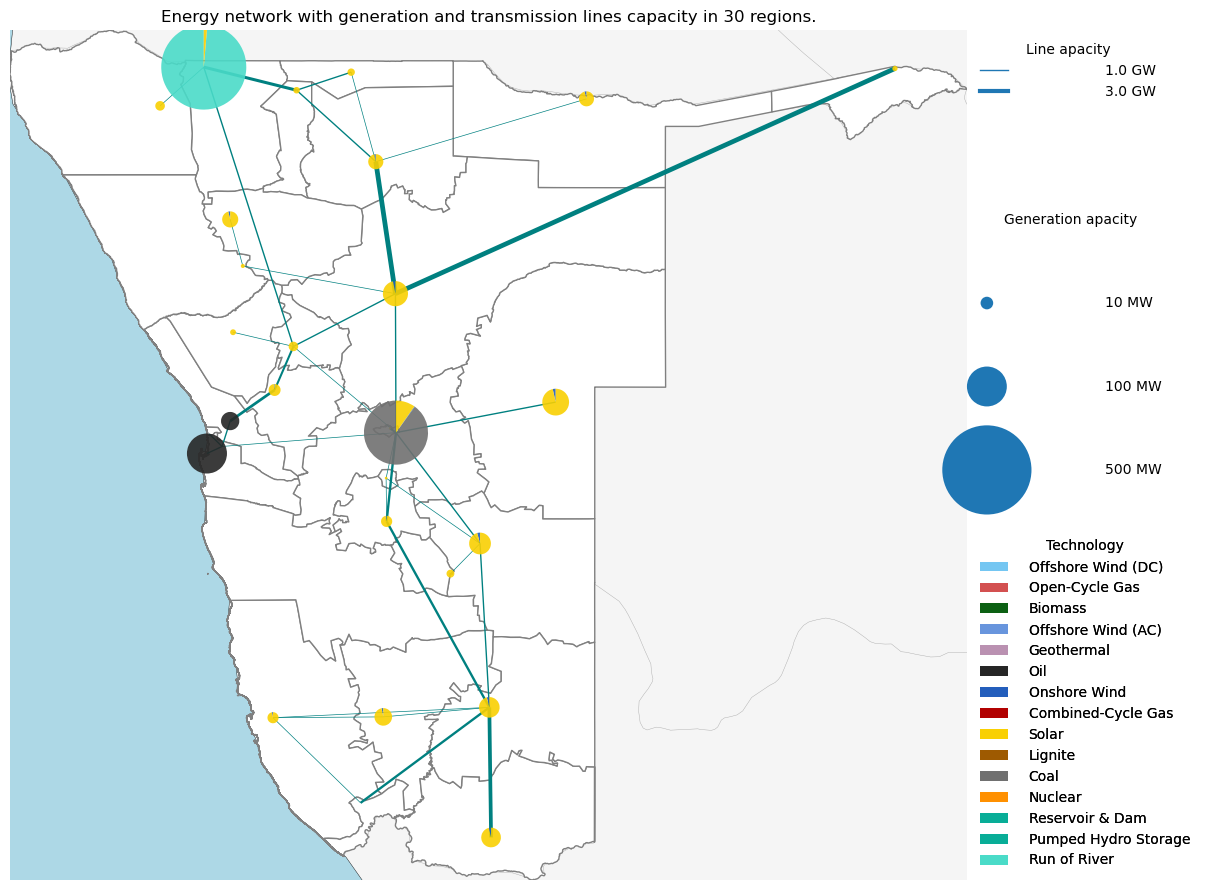

In [24]:
plot_network(n_30, True)

In [23]:
def plot_network(n, line=False, fn=None):
    bus_scale = 6e2 
    line_scale = 5e3
    fig, ax = plt.subplots(figsize=(20, 9), subplot_kw={"projection": ccrs.PlateCarree()})
    gen = n.generators.groupby(["bus", "carrier"]).p_nom.sum()
    sto = n.storage_units.groupby(["bus", "carrier"]).p_nom.sum()
    buses = pd.concat([gen, sto])
    lines=0; links=0;
    if line:
        lines = n.lines.s_nom / line_scale
        links=n.links.p_nom / line_scale,

    with plt.rc_context({"patch.linewidth": 0.}):
        n.plot(
            bus_sizes=buses / bus_scale,
            bus_alpha=0.9,
            line_widths=lines,#n.lines.s_nom / line_scale,
            link_widths=links,#n.links.p_nom / line_scale,
            line_colors="teal",
            bus_colors=n.carriers.color,
            ax=ax,
            margin=0.2,
            color_geomap=True,
            title = "Energy network with generation and transmission lines capacity in 30 regions."
        )
    regions_onshore.plot(
        ax=ax,
        facecolor="white",
        edgecolor="black",
        aspect="equal",
        transform=ccrs.PlateCarree(),
        linewidth=0,
    )
    # regions_offshore.plot(
    #     ax=ax,
    #     facecolor="blue",
    #     edgecolor="blue",
    #     aspect="equal",
    #     transform=ccrs.PlateCarree(),
    #     linewidth=1,
    # )
    #ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    ax.add_geometries(regions_onshore['geometry'], facecolor='white', edgecolor='gray', crs=ccrs.PlateCarree())
    ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    legend_kwargs = {"loc": "upper left", "frameon": False}
    # circles legend may requite some fine-tuning
    legend_circles_dict = {"bbox_to_anchor": (1, 0.8), "labelspacing":5, "handletextpad":7, "title":"Generation apacity", **legend_kwargs}
    #bus_sizes = [5000, 10e3]  # in MW
    bus_sizes = [10, 100, 500]  # in MW
    line_sizes = [1000, 3000]  # in MW
    add_legend_circles(
        ax,
        [s / bus_scale for s in bus_sizes],
        [f"{s} MW" for s in bus_sizes],
        legend_kw=legend_circles_dict,    
    )
    if line:
        add_legend_lines(
            ax,
            [s / line_scale for s in line_sizes],
            [f"{s / 1000} GW" for s in line_sizes],
            legend_kw={"bbox_to_anchor": (1, 1.0), "handletextpad":7,"title":"Line apacity", **legend_kwargs},
        )
    add_legend_patches(
        ax,
        n.carriers.color,
        n.carriers.nice_name,
        legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left", "handletextpad":1.5, "title":"Technology",},
    )
    fig.tight_layout()

In [37]:
def plot_sec_network(n, line=False, fn=None):
    bus_scale = 9e1 
    line_scale = 1e3
    fig, ax = plt.subplots(figsize=(20, 9), subplot_kw={"projection": ccrs.PlateCarree()})
    gen = n.generators.groupby(["bus", "carrier"]).p_nom.sum()
    sto = n.links.groupby(["bus0", "carrier"]).p_nom.sum()
    buses = pd.concat([gen, sto])
    lines=0; links=0;
    if line:
        lines = n.lines.s_nom / line_scale
        links=n.links.p_nom / line_scale,
    n.buses.drop(n.buses.index[n.buses.carrier != "AC"], inplace=True)
    return buses
    # with plt.rc_context({"patch.linewidth": 0.}):
    #     n.plot(
    #         bus_sizes=buses / bus_scale,
    #         bus_alpha=0.9,
    #         line_widths=lines,#n.lines.s_nom / line_scale,
    #         link_widths=links,#n.links.p_nom / line_scale,
    #         line_colors="teal",
    #         bus_colors=tech_colors,
    #         ax=ax,
    #         margin=0.2,
    #         color_geomap=True,
    #     )
    # regions_onshore.plot(
    #     ax=ax,
    #     facecolor="white",
    #     edgecolor="black",
    #     aspect="equal",
    #     transform=ccrs.PlateCarree(),
    #     linewidth=0,
    # )
    # # regions_offshore.plot(
    # #     ax=ax,
    # #     facecolor="blue",
    # #     edgecolor="blue",
    # #     aspect="equal",
    # #     transform=ccrs.PlateCarree(),
    # #     linewidth=1,
    # # )
    # #ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    # ax.add_geometries(regions_onshore['geometry'], facecolor='white', edgecolor='gray', crs=ccrs.PlateCarree())
    # ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    # legend_kwargs = {"loc": "upper left", "frameon": False}
    # # circles legend may requite some fine-tuning
    # legend_circles_dict = {"bbox_to_anchor": (1, 1.1), "labelspacing":11, "handletextpad":7, "title":"Capacity", **legend_kwargs}
    # #bus_sizes = [5000, 10e3]  # in MW
    # bus_sizes = [10, 100, 500]  # in MW
    # line_sizes = [1000, 3000]  # in MW
    # add_legend_circles(
    #     ax,
    #     [s / bus_scale for s in bus_sizes],
    #     [f"{s} MW" for s in bus_sizes],
    #     legend_kw=legend_circles_dict,    
    # )
    # if line:
    #     add_legend_lines(
    #         ax,
    #         [s / line_scale for s in line_sizes],
    #         [f"{s / 1000} GW" for s in line_sizes],
    #         legend_kw={"bbox_to_anchor": (1, 1.0), "handletextpad":7, **legend_kwargs},
    #     )
    # add_legend_patches(
    #     ax,
    #     tech_colors,
    #     n.carriers.nice_name,
    #     legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left", "handletextpad":1.5, "title":"Technology",},
    # )
    # fig.tight_layout()

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


                                   carrier                             
NAM10_AC                           csp                                     0.0
                                   offwind                                 0.0
                                   offwind2                                0.0
                                   onwind                                  0.0
                                   onwind2                                 0.0
                                                                          ... 
NAM9_AC solid biomass              solid biomass transport                 0.0
NAM9_AC urban central heat         urban central water tanks charger       0.0
NAM9_AC urban central water tanks  urban central water tanks discharger    0.0
process emissions                  process emissions                       0.0
                                   process emissions CC                    0.0
Name: p_nom, Length: 1742, dtype: float64

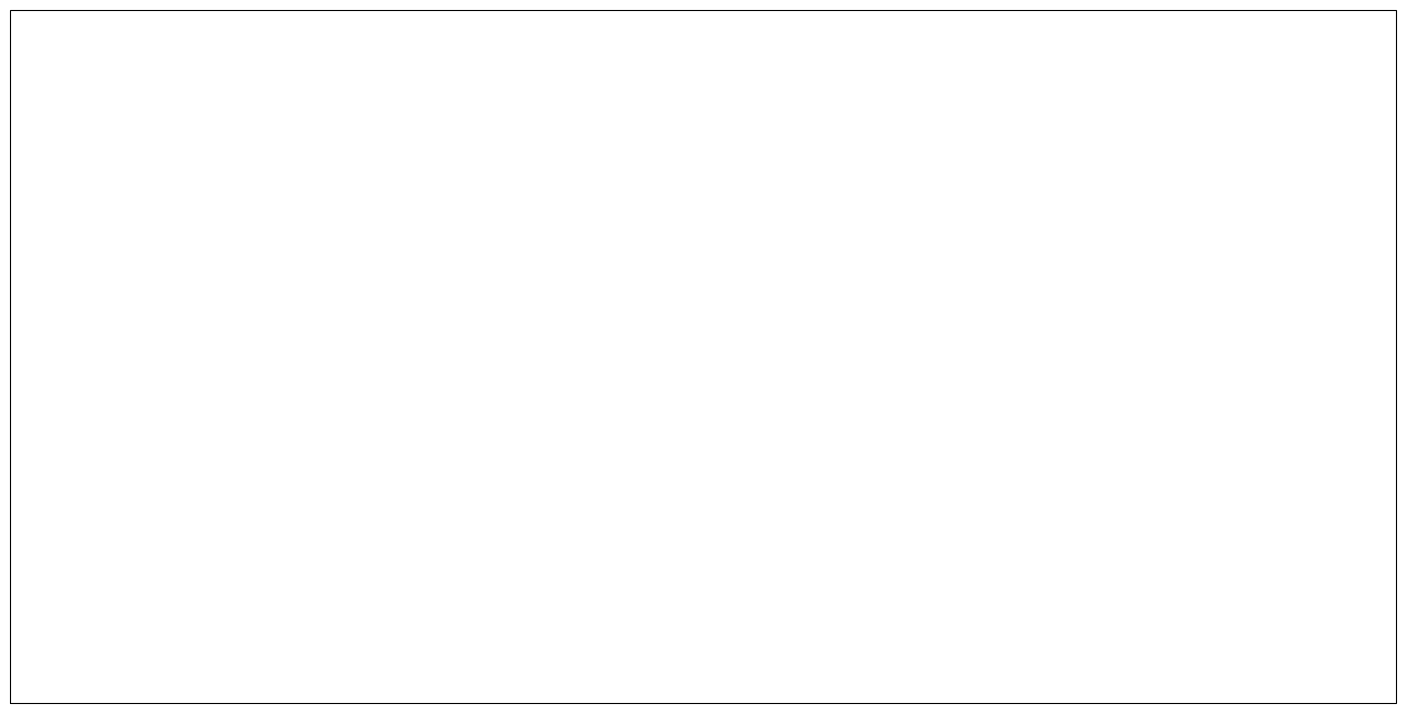

In [38]:
n=pypsa.Network("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/results/MT_real30/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_0export.nc")
# n.carriers.color = tech_colors
# n.carriers.color
plot_sec_network(n)

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 16 15:50:42 2022

@author: user
"""
import os

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pypsa
from matplotlib.legend_handler import HandlerPatch
from matplotlib.patches import Circle, Ellipse


def assign_location(n):
    for c in n.iterate_components(n.one_port_components | n.branch_components):
        ifind = pd.Series(c.df.index.str.find(" ", start=4), c.df.index)

        for i in ifind.value_counts().index:
            # these have already been assigned defaults
            if i == -1:
                continue

            names = ifind.index[ifind == i]

            c.df.loc[names, "location"] = names.str[:i]


def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            72.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


preferred_order = pd.Index(
    [
        "transmission lines",
        "hydroelectricity",
        "hydro reservoir",
        "run of river",
        "pumped hydro storage",
        "solid biomass",
        "biogas",
        "onshore wind",
        "offshore wind",
        "offshore wind (AC)",
        "offshore wind (DC)",
        "solar PV",
        "solar thermal",
        "solar",
        "building retrofitting",
        "ground heat pump",
        "air heat pump",
        "heat pump",
        "resistive heater",
        "power-to-heat",
        "gas-to-power/heat",
        "CHP",
        "OCGT",
        "gas boiler",
        "gas",
        "natural gas",
        "helmeth",
        "methanation",
        "hydrogen storage",
        "power-to-gas",
        "power-to-liquid",
        "battery storage",
        "hot water storage",
        "CO2 sequestration",
    ]
)


def rename_techs(label):
    prefix_to_remove = [
        "residential ",
        "services ",
        "urban ",
        "rural ",
        "central ",
        "decentral ",
    ]

    rename_if_contains = [
        "CHP",
        "gas boiler",
        "biogas",
        "solar thermal",
        "air heat pump",
        "ground heat pump",
        "resistive heater",
        "Fischer-Tropsch",
    ]

    rename_if_contains_dict = {
        "water tanks": "hot water storage",
        "retrofitting": "building retrofitting",
        "H2": "hydrogen storage",
        "battery": "battery storage",
        "CCS": "CCS",
    }

    rename = {
        "solar": "solar PV",
        "Sabatier": "methanation",
        "offwind": "offshore wind",
        "offwind-ac": "offshore wind (AC)",
        "offwind-dc": "offshore wind (DC)",
        "onwind": "onshore wind",
        "ror": "hydroelectricity",
        "hydro": "hydroelectricity",
        "PHS": "hydroelectricity",
        "co2 Store": "DAC",
        "co2 stored": "CO2 sequestration",
        "AC": "transmission lines",
        "DC": "transmission lines",
        "B2B": "transmission lines",
    }

    for ptr in prefix_to_remove:
        if label[: len(ptr)] == ptr:
            label = label[len(ptr) :]

    for rif in rename_if_contains:
        if rif in label:
            label = rif

    for old, new in rename_if_contains_dict.items():
        if old in label:
            label = new

    for old, new in rename.items():
        if old == label:
            label = new
    return label


def rename_techs_tyndp(tech):
    tech = rename_techs(tech)
    if "heat pump" in tech or "resistive heater" in tech:
        return "power-to-heat"
    elif tech in ["methanation", "hydrogen storage", "helmeth"]:
        return "power-to-gas"
    elif tech in ["OCGT", "CHP", "gas boiler"]:
        return "gas-to-power/heat"
    elif "solar" in tech:
        return "solar"
    elif tech == "Fischer-Tropsch":
        return "power-to-liquid"
    elif "offshore wind" in tech:
        return "offshore wind"
    elif tech in ["solid biomass", "biomass", "gas boiler"]:
        return "biomass"
    else:
        return tech


def plot_map(
    network,
    components=[
        "links",
        "generators",
        "stores",
    ],  # "storage_units"], #TODO uncomment after adding storage units
    bus_size_factor=2e10,
    transmission=True,
    geometry=True,
):
    n = network.copy()
    assign_location(n)
    # Drop non-electric buses so they don't clutter the plot
    n.buses.drop(n.buses.index[n.buses.carrier != "AC"], inplace=True)


    costs = pd.DataFrame(index=n.buses.index)
    for comp in components:
        df_c = getattr(n, comp)
        df_c["nice_group"] = df_c.carrier.map(rename_techs_tyndp)

        attr = "e_nom_opt" if comp == "stores" else "p_nom_opt"    
        costs_c = (
            (df_c[attr])
            .groupby([df_c.location, df_c.nice_group])
            .sum()
            .unstack()
            .fillna(0.0)
        )
        costs = pd.concat([costs, costs_c], axis=1)

        #print(comp, costs)
    costs = costs.groupby(costs.columns, axis=1).sum()

    costs.drop(list(costs.columns[(costs == 0.0).all()]), axis=1, inplace=True)

    new_columns = preferred_order.intersection(costs.columns).append(
        costs.columns.difference(preferred_order)
    )
    costs = costs[new_columns]
    #print(costs[new_columns])
    for item in new_columns:
        if item not in tech_colors:
            print("Warning!", item, "not in config/plotting/tech_colors")

    costs = costs.stack()  # .sort_index()

    n.links.drop(
        n.links.index[(n.links.carrier != "DC") & (n.links.carrier != "B2B")],
        inplace=True,
    )

    # drop non-bus
    to_drop = costs.index.levels[0].symmetric_difference(n.buses.index)
    if len(to_drop) != 0:
        print("dropping non-buses", list(to_drop))
        costs.drop(to_drop, level=0, inplace=True, axis=0)

    # make sure they are removed from index
    costs.index = pd.MultiIndex.from_tuples(costs.index.values)

    # PDF has minimum width, so set these to zero
    line_lower_threshold = 500.0
    line_upper_threshold = 1e4
    linewidth_factor = 2e3
    ac_color = "gray"
    dc_color = "m"

    # if snakemake.wildcards["lv"] == "1.0":         #TODO when we add wildcard lv
    # should be zero
    line_widths = n.lines.s_nom_opt - n.lines.s_nom
    link_widths = n.links.p_nom_opt - n.links.p_nom
    title = "Technologies"

    if transmission:
        line_widths = n.lines.s_nom_opt
        link_widths = n.links.p_nom_opt
        linewidth_factor = 2e3
        line_lower_threshold = 0.0
        title = "Technologies"
    else:
        line_widths = n.lines.s_nom_opt - n.lines.s_nom_min
        line_widths = (
            n.lines.s_nom_opt - n.lines.s_nom_opt
        )  # TODO when we add wildcard lv
        link_widths = n.links.p_nom_opt - n.links.p_nom_min
        title = "Transmission reinforcement"

        if transmission:
            line_widths = n.lines.s_nom_opt
            link_widths = n.links.p_nom_opt
            title = "Total transmission"

    line_widths.loc[line_widths < line_lower_threshold] = 0.0
    link_widths.loc[link_widths < line_lower_threshold] = 0.0

    line_widths.loc[line_widths > line_upper_threshold] = line_upper_threshold
    link_widths.loc[link_widths > line_upper_threshold] = line_upper_threshold

    fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
    fig.set_size_inches(10.5, 9)
    
    print(costs)
    costs.plot(kind="bar")
    # n.plot(
    #     bus_sizes=costs / bus_size_factor,
    #     bus_colors=tech_colors,
    #     line_colors=ac_color,
    #     link_colors=dc_color,
    #     line_widths=line_widths / linewidth_factor,
    #     link_widths=link_widths / linewidth_factor,
    #     ax=ax,
    #     # boundaries=(-20, 0, 25, 40),
    #     geomap="10m",
    #     color_geomap=True
    # )

    # handles = make_legend_circles_for(
    #     [5e9, 1e9], scale=bus_size_factor, facecolor="gray"
    # )
    # labels = ["{} GW".format(s) for s in (3, 1)]
    # l2 = ax.legend(
    #     handles,
    #     labels,
    #     loc="upper left",
    #     bbox_to_anchor=(0.7, 0.9),
    #     labelspacing=3.0,
    #     handletextpad=1.5,
    #     frameon=False,
    #     title="Generation Capacity",
    #     fontsize=12,
    #     handler_map=make_handler_map_to_scale_circles_as_in(ax),
    # )
    # ax.add_artist(l2)

    # handles = []
    # labels = []

    # for s in list(plot_labeles.keys()):
    #     handles.append(plt.Line2D([0], [0], color=tech_colors[s], linewidth=5))
    #     labels.append("{}".format(s))

    # l1_1 = ax.legend(
    #     handles,
    #     labels,
    #     loc="upper left",
    #     bbox_to_anchor= (0.6, 0.5),
    #     frameon=False,
    #     labelspacing=0.4,
    #     handletextpad=1.5,
    #     fontsize=10,
    # )

    # ax.add_artist(l1_1)

plot_labeles = {
    "solar": "",
    "biogas": '',
    "gas" : "",
    "power-to-gas": "",
    "gas-to-power/heat": "",
    "biomass":"",
    "oil":""
}


nice_names = {
    "OCGT": "Gas",
    "OCGT marginal": "Gas (marginal)",
    "offwind": "offshore wind",
    "onwind": "onshore wind",
    "battery": "Battery storage",
    "lines": "Transmission lines",
    "AC line": "AC lines",
    "AC-AC": "DC lines",
    "ror": "Run of river",
}

nice_names_n = {
    "offwind": "offshore\nwind",
    "onwind": "onshore\nwind",
    "OCGT": "Gas",
    "H2": "Hydrogen\nstorage",
    "OCGT marginal": "Gas (marginal)",
    "lines": "transmission\nlines",
    "ror": "run of river",
}


# if __name__ == "__main__":
#     if "snakemake" not in globals():
#         import os

#         from helpers import mock_snakemake

#         os.chdir(os.path.dirname(os.path.abspath(__file__)))
#         snakemake = mock_snakemake(
#             "plot_network",
#             simpl="",
#             clusters="23",
#             ll="c1.0",
#             opts="Co2L",
#             planning_horizons="2030",
#             sopts="144H",
#             discountrate=0.071,
#             demand="NZ",
#         )

#     n = pypsa.Network(snakemake.input.network)

#     tech_colors = snakemake.config["plotting"]["tech_colors"]
#     plot_map(n, transmission=False)
#     plot_transmission_topology(n)
#     if snakemake.config["sector"]["SMR"]:
#         plot_smr(n)
#     plot_h2_infra(n)
n=pypsa.Network("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/results/MT_real30/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_200export.nc")
plot_map(n)


INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_200export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


NameError: name 'tech_colors' is not defined

In [8]:
n=pypsa.Network("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/results/MT_real30/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_200export.nc")
#plot_map(n)

n.generators.p_nom_opt.sort_values(ascending=False).head(10)

INFO:pypsa.io:Imported network elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_200export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


Generator
NAM12_AC solar    172661.229608
NAM19_AC solar      2452.818569
NAM10_AC solar      1279.844075
NAM15_AC solar       562.137136
NAM4_AC ror          213.779148
NAM9_AC coal         110.632435
NAM9_AC gas           51.942214
NAM20_AC oil          48.014189
NAM4_AC gas           33.068140
NAM6_AC gas           32.244240
Name: p_nom_opt, dtype: float64

INFO:pypsa.io:Imported network elec_s_31_ec_lc1.0_Co2L_3H_2030_0.082_AP_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


dropping non-buses ['CO2 pipeline', 'H2 export', 'biomass', 'process']
NAM10_AC  hydroelectricity                     0.000000
          biogas                           59777.060657
          onshore wind                       471.015678
          offshore wind                        0.000000
          solar                            26412.355766
                                               ...     
NAM9_AC   oil                                  0.000000
          onwind2                            256.857813
          process emissions CC             14833.792293
          solid biomass for industry CC      315.918229
          solid biomass transport              0.000000
Length: 638, dtype: float64
NAM10_AC                                  csp                                          0.0
                                          offwind                                      0.0
                                          offwind2                                     0.0
            

AssertionError: The first MultiIndex level of bus_sizes must contain buses

/home/raj08555/.conda/envs/pypsa-earth-old/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


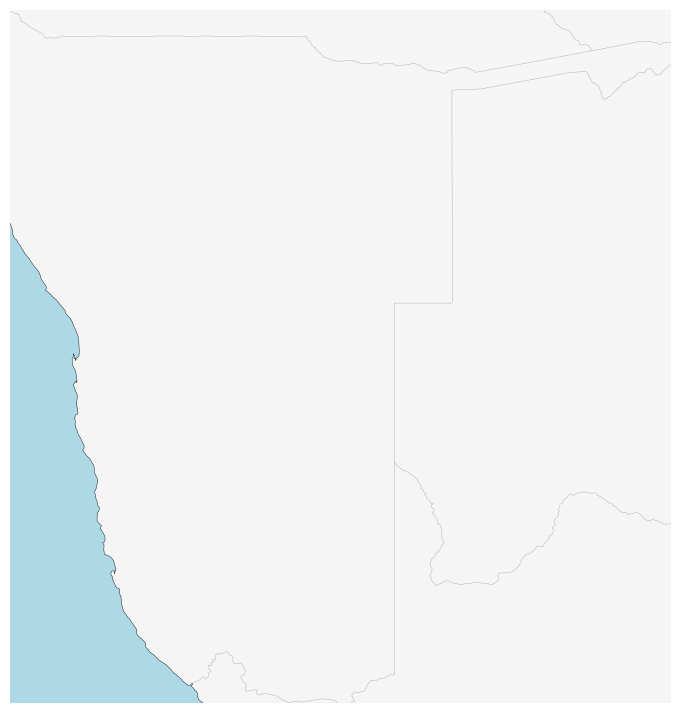

In [128]:

#plot_opt_network(n, True)

In [13]:
#n=pypsa.Network("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/results/MT_opt30/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.076_AP_0export.nc")
#plot_opt_network(n_30, True)
# n.carriers.color = colors["tech_colors"]
# if n.carriers.color == "":
#     print("yes")
# else:
#     print("no")
# #plot_elec_network(n)
tech_colors

{'hydroelectricity': 'blue',
 'SMR CC': 'darkblue',
 'gas for industry CC': 'brown',
 'process emissions CC': 'gray',
 'CO2 pipeline': '#999999',
 'onwind': 'dodgerblue',
 'onwind2': 'dodgerblue',
 'onshore wind': '#235ebc',
 'offwind': '#6895dd',
 'offwind2': '#6895dd',
 'csp': 'coral',
 'offshore wind': '#6895dd',
 'offwind-ac': 'c',
 'offshore wind (AC)': '#6895dd',
 'offwind-dc': '#74c6f2',
 'offshore wind (DC)': '#74c6f2',
 'wave': '#004444',
 'hydro': '#3B5323',
 'hydro reservoir': '#3B5323',
 'ror': '#78AB46',
 'run of river': '#78AB46',
 'solar': 'orange',
 'solar PV': '#f9d002',
 'solar thermal': 'coral',
 'solar rooftop': '#ffef60',
 'OCGT': 'wheat',
 'OCGT marginal': 'sandybrown',
 'OCGT-heat': '#ee8340',
 'gas boiler': '#ee8340',
 'gas boilers': '#ee8340',
 'gas boiler marginal': '#ee8340',
 'gas-to-power/heat': 'yellow',
 'gas': 'teal',
 'natural gas': 'brown',
 'SMR': '#4F4F2F',
 'oil': 'darkgray',
 'oil boiler': '#B5A677',
 'lines': 'k',
 'transmission lines': 'k',
 'H2'

In [12]:
tech_colors={
                "hydroelectricity":"blue",
                "SMR CC": "darkblue",
                "gas for industry CC": "brown",
                "process emissions CC": "gray",
                "CO2 pipeline": "gray",
                "onwind": "dodgerblue",
                "onwind2": "dodgerblue",
                "onshore wind": "#235ebc",
                "offwind": "#6895dd",
                "offwind2": "#6895dd",
                "csp": "coral",
                "offshore wind": "#6895dd",
                "offwind-ac": "c",
                "offshore wind (AC)": "#6895dd",
                "offwind-dc": "#74c6f2",
                "offshore wind (DC)": "#74c6f2",
                "wave": '#004444',
                "hydro": '#3B5323',
                "hydro reservoir": '#3B5323',
                "ror": '#78AB46',
                "run of river": '#78AB46',
                "hydroelectricity": 'blue',
                "solar": "orange",
                "solar PV": "#f9d002",
                "solar thermal": "coral",
                "solar rooftop": '#ffef60',
                "OCGT": "wheat",
                "OCGT marginal": "sandybrown",
                "OCGT-heat": '#ee8340',
                "gas boiler": '#ee8340',
                "gas boilers": '#ee8340',
                "gas boiler marginal": '#ee8340',
                "gas-to-power/heat": 'yellow',
                "gas": "teal",
                "natural gas": "brown",
                "SMR": '#4F4F2F',
                "oil": 'darkgray',
                "oil boiler": '#B5A677',
                "lines": "k",
                "transmission lines": "k",
                "H2": "m",
                "H2 liquefaction": "m",
                "hydrogen storage": "m",
                "battery": "slategray",
                "battery storage": "slategray",
                "home battery": '#614700',
                "home battery storage": '#614700',
                "Nuclear": "r",
                "Nuclear marginal": "r",
                "nuclear": "r",
                "uranium": "r",
                "Coal": "k",
                "coal": "k",
                "Coal marginal": "k",
                "Lignite": "grey",
                "lignite": "grey",
                "Lignite marginal": "grey",
                "CCGT": '#ee8340',
                "CCGT marginal": '#ee8340',
                "heat pumps": '#76EE00',
                "heat pump": '#76EE00',
                "air heat pump": '#76EE00',
                "ground heat pump": '#40AA00',
                "power-to-heat": 'red',
                "resistive heater": "pink",
                "Sabatier": '#FF1493',
                "methanation": '#FF1493',
                "power-to-gas": 'purple',
                "power-to-liquid": '#800000',
                "helmeth": '#7D0552',
                "DAC": 'deeppink',
                "co2 stored": '#123456',
                "CO2 sequestration": 'pink',
                "CC": "k",
                "co2": '#123456',
                "co2 vent": '#654321',
                "agriculture heat": '#D07A7A',
                "agriculture machinery oil": '#1e1e1e',
                "agriculture machinery oil emissions": '#111111',
                "agriculture electricity": '#222222',
                "solid biomass for industry co2 from atmosphere": 'black',
                "solid biomass for industry co2 to stored": 'black',
                "solid biomass for industry CC": 'black',
                "gas for industry co2 to atmosphere": '#654321',
                "gas for industry co2 to stored": '#654321',
                "Fischer-Tropsch": '#44DD33',
                "kerosene for aviation": '#44BB11',
                "naphtha for industry": '#44FF55',
                "land transport oil": '#44DD33',
                "water tanks": '#BBBBBB',
                "hot water storage": 'black',
                "hot water charging": '#BBBBBB',
                "hot water discharging": '#999999',
                "CO2 pipeline": '#999999',
                "CHP": "r",
                "CHP heat": "r",
                "CHP electric": "r",
                "PHS": "g",
                "Ambient": "k",
                "Electric load": "b",
                "Heat load": "r",
                "heat": "darkred",
                "rural heat": '#880000',
                "central heat": '#b22222',
                "decentral heat": '#800000',
                "low-temperature heat for industry": '#991111',
                "process heat": '#FF3333',
                "heat demand": "darkred",
                "electric demand": "k",
                "Li ion": "grey",
                "district heating": '#CC4E5C',
                "retrofitting": "purple",
                "building retrofitting": "purple",
                "BEV charger": "grey",
                "V2G": "grey",
                "land transport EV": "grey",
                "electricity":" k",
                "gas for industry": '#333333',
                "solid biomass for industry": 'black',
                "industry electricity": '#222222',
                "industry new electricity": '#222222',
                "process emissions to stored": '#444444',
                "process emissions to atmosphere": '#888888',
                "process emissions": '#222222',
                "oil emissions": '#666666',
                "industry oil emissions": '#666666',
                "land transport oil emissions": '#666666',
                "land transport fuel cell": '#AAAAAA',
                "biogas": 'darkgreen',
                "solid biomass": 'black',
                "biomass": 'black',
                "today": '#D2691E',
                "shipping": '#6495ED',
                "shipping oil": "#6495ED",
                "shipping oil emissions": "#6495ED",
                "electricity distribution grid": 'white',
                "solid biomass transport": "black",
                "H2 for industry": "#222222",
                "H2 for shipping": "#6495ED",
                "biomass EOP": "black",
                "agriculture oil": "darkgray",
                "residential rural heat": "darkgray",
                "residential rural water tanks": "darkgray",
                "residential rural solar thermal": "darkgray",
                "services rural heat": "darkgray",
                "services rural water tanks":"darkgray",
                "services rural solar thermal":"darkgray",
                "residential urban decentral heat":"darkgray",
                "residential urban decentral water tanks":"darkgray",
                "residential urban decentral solar thermal":"darkgray",
                "services urban decentral heat":"darkgray",
                "services urban decentral water tanks":"darkgray",
                "services urban decentral solar thermal":"darkgray",
                "urban central heat":"darkgray",
                "urban central water tanks":"darkgray",
                "urban central solar thermal":"darkgray",
                "geothermal":"black"
        }